# 可视化训练日志-训练过程训练集各类别评估指标

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-08-19 10:54:54--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  23.5MB/s    用时 0.4s    

2023-08-19 10:54:55 (23.5 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



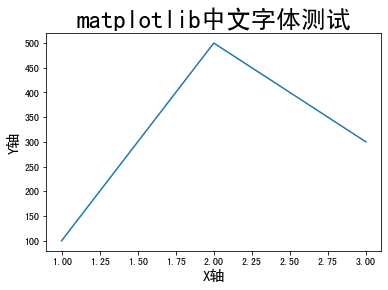

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [5]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 进入MMSegmentation主目录

In [6]:
import os
os.chdir('mmsegmentation')

In [7]:
os.getcwd()

'/home/featurize/work/MMSegmentation教程20230625/0816录制视频/mmsegmentation'

## 导入工具包

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 类别列表

In [ ]:
# 类别列表
class_list = ['background', 'red', 'green', 'white', 'seed-black', 'seed-white']

## 载入日志文件

In [13]:
# 日志文件路径
log_path = './work_dirs/ZihaoDataset-PSPNet/20230818_210528/20230818_210528.log'

In [14]:
with open(log_path, 'r') as f:
    logs = f.read()

In [15]:
## 定义正则表达式
import re
import numpy as np

def transform_table_line(raw):
    raw = list(map(lambda x: x.split('|'), raw))
    raw = list(map(
      lambda row: list(map(
          lambda col: float(col.strip()),
          row
      )),
      raw
    ))
    return raw

## 横轴-训练迭代次数

In [16]:
x = range(500, 40500, 500)

In [17]:
len(x)

80

## 定义正则表达式

In [18]:
metrics_json = {}
for each_class in class_list: # 遍历每个类别
    re_pattern = r'\s+{}.*?\|(.*)?\|'.format(each_class) # 定义该类别的正则表达式
    metrics_json[each_class] = {}
    metrics_json[each_class]['re_pattern'] = re.compile(re_pattern)

In [19]:
# 匹配
for each_class in class_list: # 遍历每个类别
    find_string = re.findall(metrics_json[each_class]['re_pattern'], logs) # 粗匹配
    find_string = transform_table_line(find_string) # 精匹配
    metrics_json[each_class]['metrics'] = find_string

In [20]:
metrics_json.keys()

dict_keys(['background', 'red', 'green', 'white', 'seed-black', 'seed-white'])

## 查看某一类别的评估指标 IoU Acc Dice Fscore Precision Recall

In [21]:
each_class = 'red'
each_class_metrics = np.array(metrics_json[each_class]['metrics'])

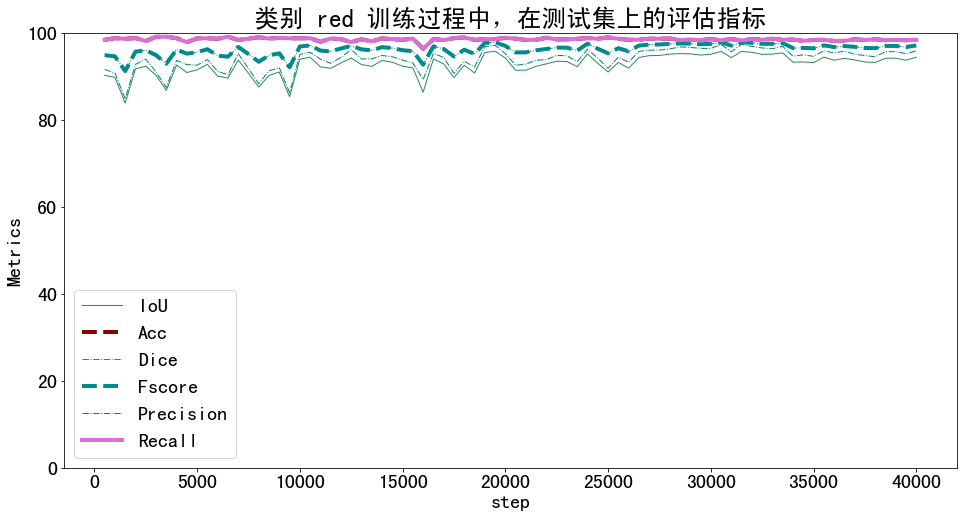

In [22]:
plt.figure(figsize=(16, 8))

for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):

    try:
        plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('类别 {} 训练过程中，在测试集上的评估指标'.format(each_class), fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/类别 {} 训练过程评估指标.pdf'.format(each_class), dpi=120, bbox_inches='tight')

plt.show()

## x的元素个数，应和`metrics_json[each_class]['metrics']`元素个数一致，绘图才能成功

## 查看每个类别的评估指标 IoU Acc Dice Fscore Precision Recall

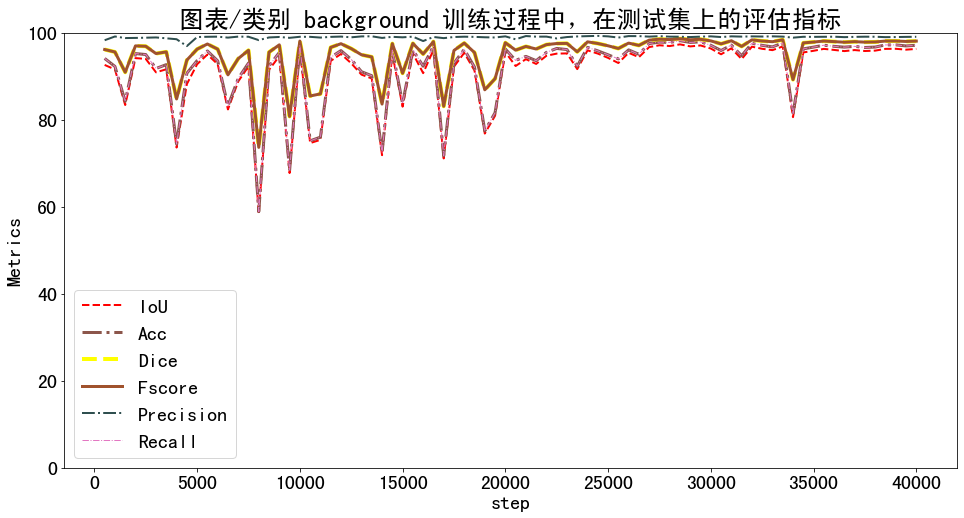

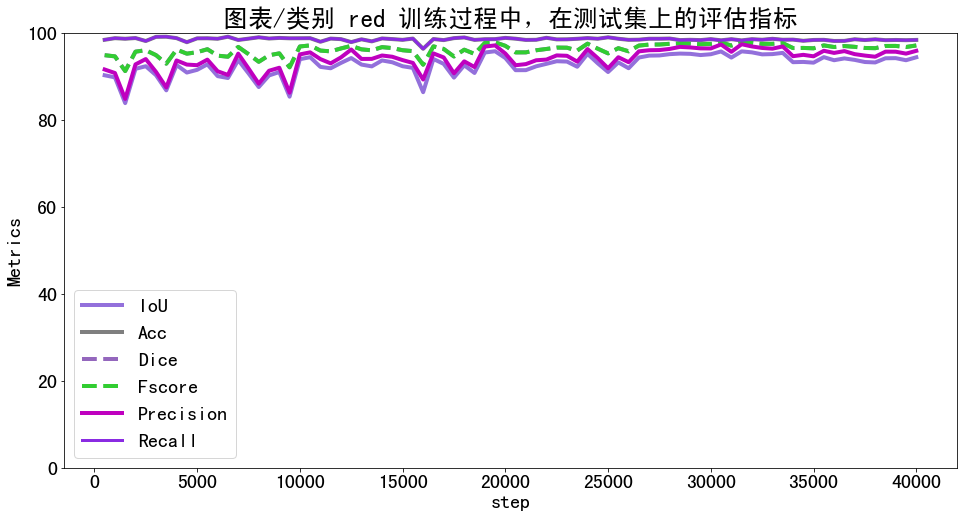

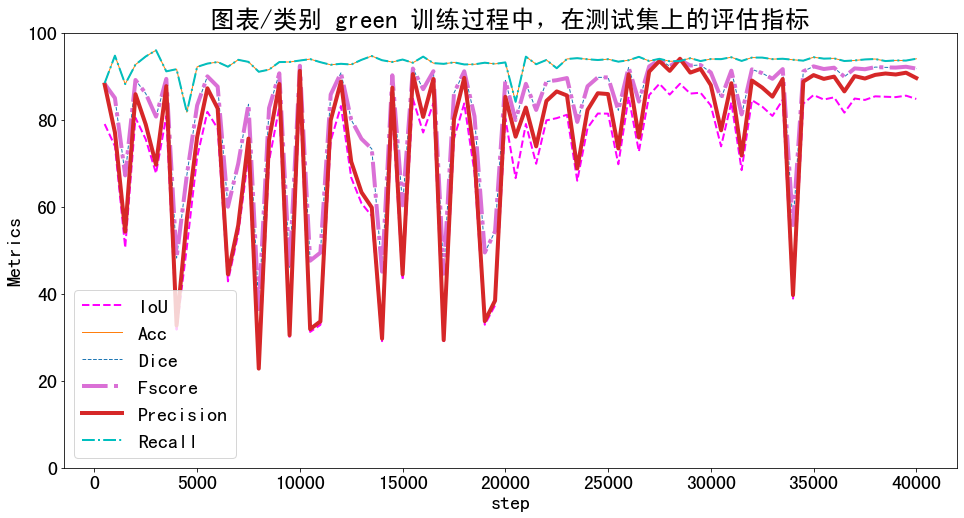

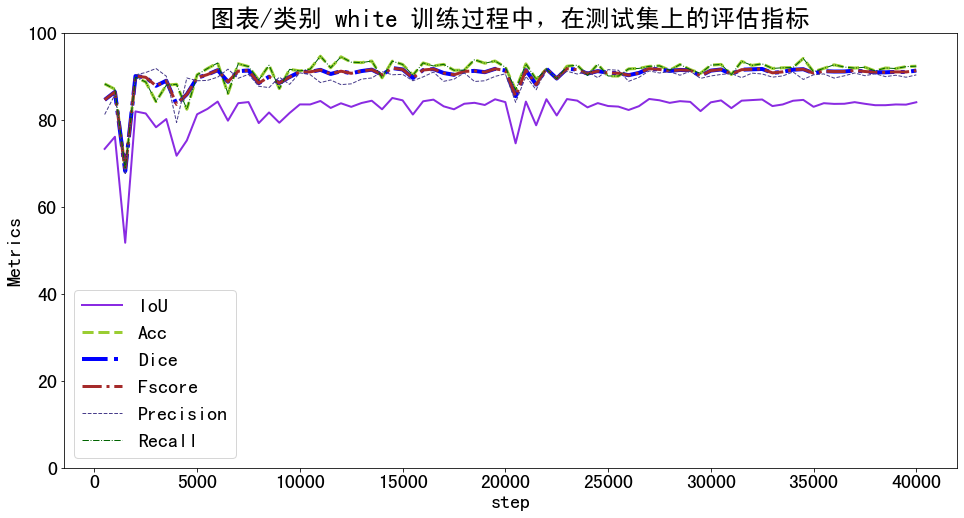

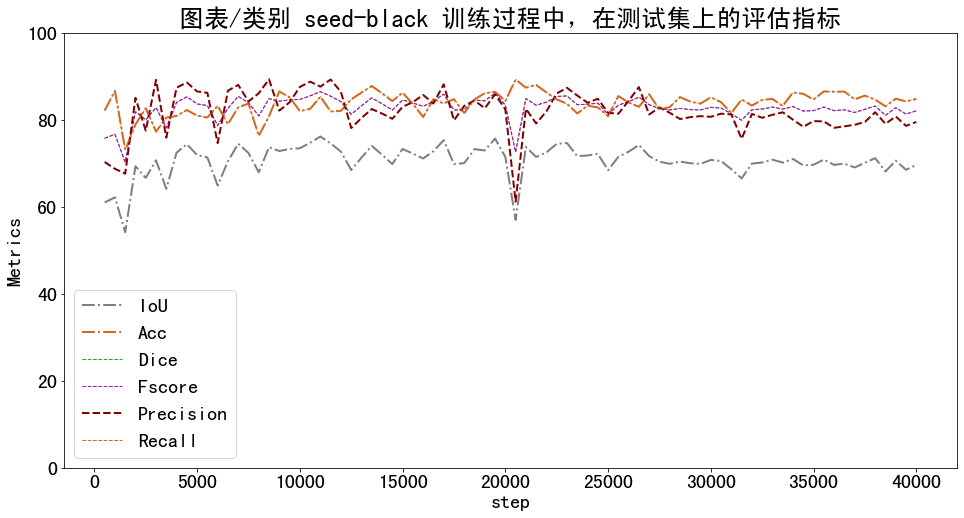

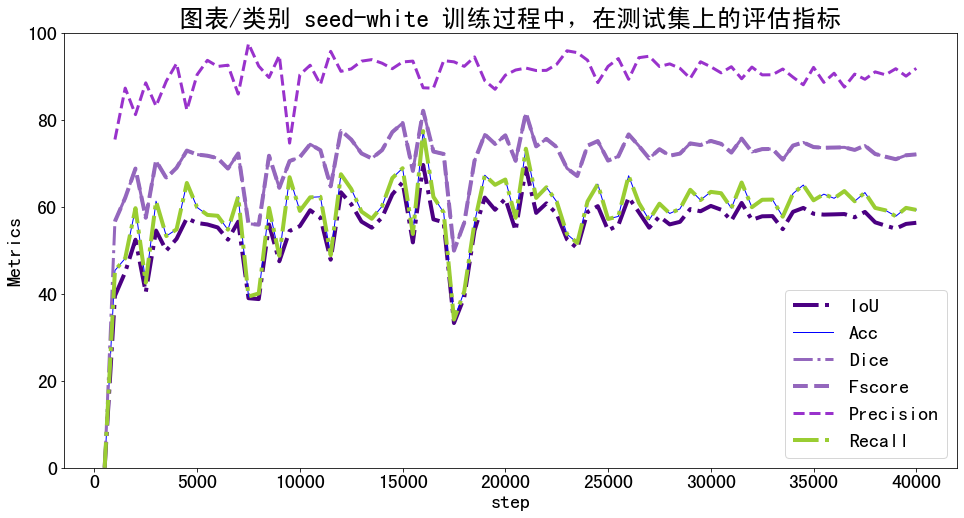

In [23]:
for each_class in class_list: # 遍历每个类别
    each_class_metrics = np.array(metrics_json[each_class]['metrics'])
    
    plt.figure(figsize=(16, 8))

    for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):

        try:
            plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
        except:
            pass

    plt.tick_params(labelsize=20)
    plt.ylim([0, 100])
    plt.xlabel('step', fontsize=20)
    plt.ylabel('Metrics', fontsize=20)
    plt.title('图表/类别 {} 训练过程中，在测试集上的评估指标'.format(each_class), fontsize=25)

    plt.legend(fontsize=20)

    # plt.savefig('类别 {} 训练过程评估指标.pdf'.format(each_class), dpi=120, bbox_inches='tight')

    plt.show()